# Detección de Anomalías en el Mercado de Bitcoin: Análisis de Picos y Caídas Significativas entre 2012 y 2024

## Introducción:

El mercado de Bitcoin ha experimentado un crecimiento exponencial desde su creación en 2009, convirtiéndose en uno de los activos financieros más relevantes y volátiles del siglo XXI. A lo largo de su historia, Bitcoin ha sido testigo de múltiples picos y caídas drásticas en su precio, fenómeno que ha captado la atención de inversores, analistas y reguladores por igual. Estos movimientos extremos, también conocidos como "anomalías de mercado", pueden ser provocados por una variedad de factores, incluyendo cambios regulatorios, avances tecnológicos, fluctuaciones macroeconómicas y la especulación del mercado.

Este proyecto tiene como objetivo principal detectar y analizar las anomalías significativas en los precios de Bitcoin desde 2012 hasta la actualidad, enfocándose en identificar los picos y caídas más marcados y comprender las posibles causas detrás de estos movimientos. Utilizando técnicas de análisis de series temporales y detección de anomalías, como el algoritmo Isolation Forest, se busca ofrecer un enfoque cuantitativo y basado en datos para entender mejor el comportamiento errático del precio de Bitcoin.

El análisis de estos picos y caídas no solo es relevante para los inversores, sino también para las entidades regulatorias y los analistas económicos, ya que puede proporcionar valiosos insights sobre las dinámicas del mercado de criptomonedas. Este estudio podría contribuir a predecir futuros movimientos en el mercado y mejorar las estrategias de inversión, además de proporcionar una mejor comprensión de los factores que impulsan la volatilidad en los mercados digitales.

## 1. Alcance y objetivo del proyecto:

    - Detectar picos y caídas drásticas en los precios de Bitcoin.
    - Analizar las posibles causas detrás de esos movimientos.

In [1]:
#Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [2]:
# Cargar los datos
df = pd.read_csv('dashboard_bitcoin.csv')
df.head()

,Timestamp,Open,High,Low,Close,Volume,return
0,2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.0,NaN
1,2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.0,0.0
2,2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.0,0.0
3,2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.0,0.0
4,2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.0,0.0


In [3]:
# Convertir el timestamp a formato datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [4]:
# Verificar si hay valores nulos
df.isnull().sum()

Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
return       1
dtype: int64

In [5]:
# Verificar el tipo de datos
df.dtypes

Timestamp    datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume              float64
return              float64
dtype: object

In [6]:
# Descripción estadística de los datos
df.describe()

,Timestamp,Open,High,Low,Close,Volume,return
count,6725280,6.725280e+06,6.725280e+06,6.725280e+06,6.725280e+06,6.725280e+06,6.725279e+06
mean,2018-05-25 00:16:14.385827840,1.440961e+04,1.441585e+04,1.440319e+04,1.440964e+04,5.471728e+00,3.209838e-06
min,2012-01-01 10:01:00,3.800000e+00,3.800000e+00,3.800000e+00,3.800000e+00,0.000000e+00,-4.604705e-01
25%,2015-03-14 03:00:45,4.122500e+02,4.124600e+02,4.120700e+02,4.122400e+02,1.827821e-02,-2.339181e-04
50%,2018-05-24 20:00:30,6.237120e+03,6.239980e+03,6.233660e+03,6.237130e+03,5.000000e-01,0.000000e+00
75%,2021-08-04 13:00:15,2.303487e+04,2.304210e+04,2.302600e+04,2.303400e+04,3.187313e+00,2.454959e-04
max,2024-12-08 00:00:00,1.036260e+05,1.036470e+05,1.036180e+05,1.036250e+05,5.853852e+03,8.532000e-01
std,NaN,1.939492e+04,1.940245e+04,1.938728e+04,1.939502e+04,2.295976e+01,1.872240e-03


In [7]:
#No usaremos la variable return, así que la eliminamos
df.drop(columns = 'return', inplace = True)

## 2. Análisis Exploratorio de Datos (EDA)

### 2.1. Visualización de la serie temporal:

Visualizar la evolución de los precios para observar picos y caídas visualmente.

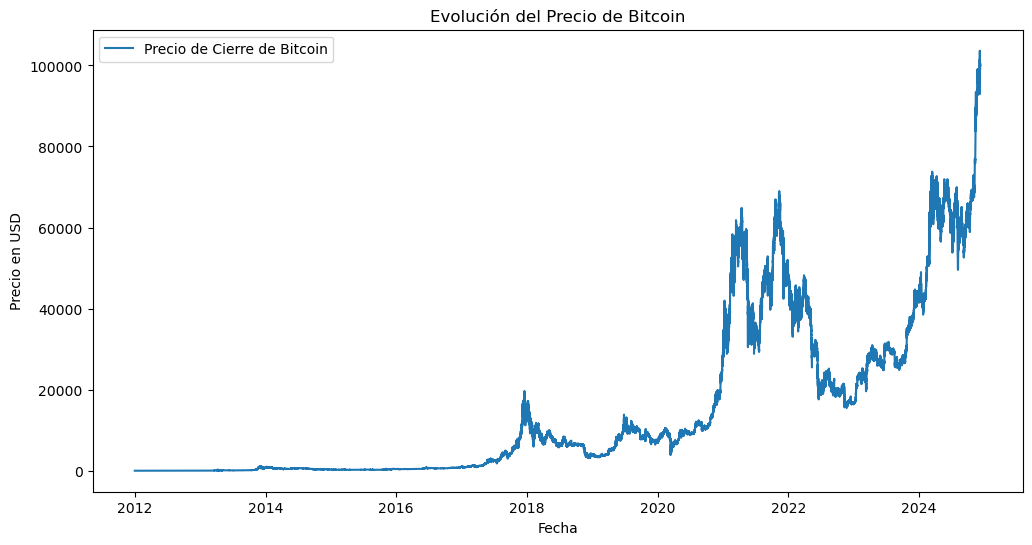

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df['Timestamp'], df['Close'], label='Precio de Cierre de Bitcoin')
plt.title('Evolución del Precio de Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio en USD')
plt.legend()
plt.show()

### 2.2. Estadísticas de precios: 

Averiguar como se distribuyen los precios y observa si hay outliers visibles.

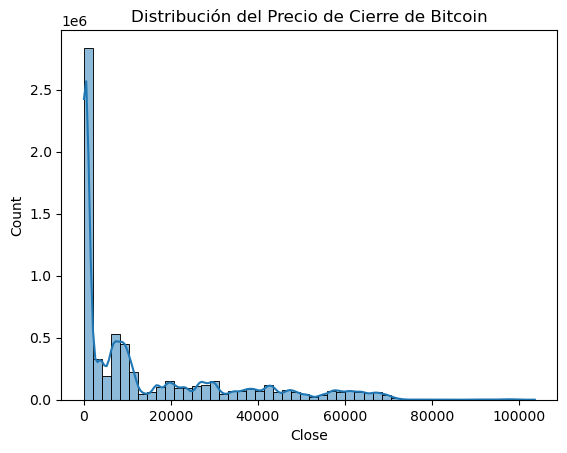

In [9]:
sns.histplot(df['Close'], kde=True, bins = 50)
plt.title('Distribución del Precio de Cierre de Bitcoin')
plt.show()

El histograma muestra la distribución del precio de cierre del Bitcoin desde su aparición en 2012 hasta la actualidad. En la gráfica, se observa una concentración significativa de valores en los precios más bajos (cerca de 0 a 10,000 USD), lo que indica que durante gran parte de su historia, el Bitcoin tuvo precios relativamente bajos. Sin embargo, a medida que los precios aumentan, la frecuencia disminuye considerablemente, formando una cola larga hacia la derecha.

Esto sugiere una distribución asimétrica positiva, típica de fenómenos donde ocurren valores extremos (outliers) hacia los precios más altos, como los máximos históricos alcanzados por el Bitcoin en los últimos años. La densidad suavizada (línea azul) también refuerza esta concentración inicial y muestra que los picos más altos están lejos de la mayoría de los datos, destacando la volatilidad del activo.

## 3. Detección de Anomalías para Identificar Picos y Caídas

Para detectar los momentos en los que Bitcoin tuvo grandes movimientos. Utilizaremos Isolation Forest, un algoritmo para detectar anomalías.

1. Definir el modelo de detección de anomalías:

    Identificar los puntos donde ocurren los picos y las caídas significativas.

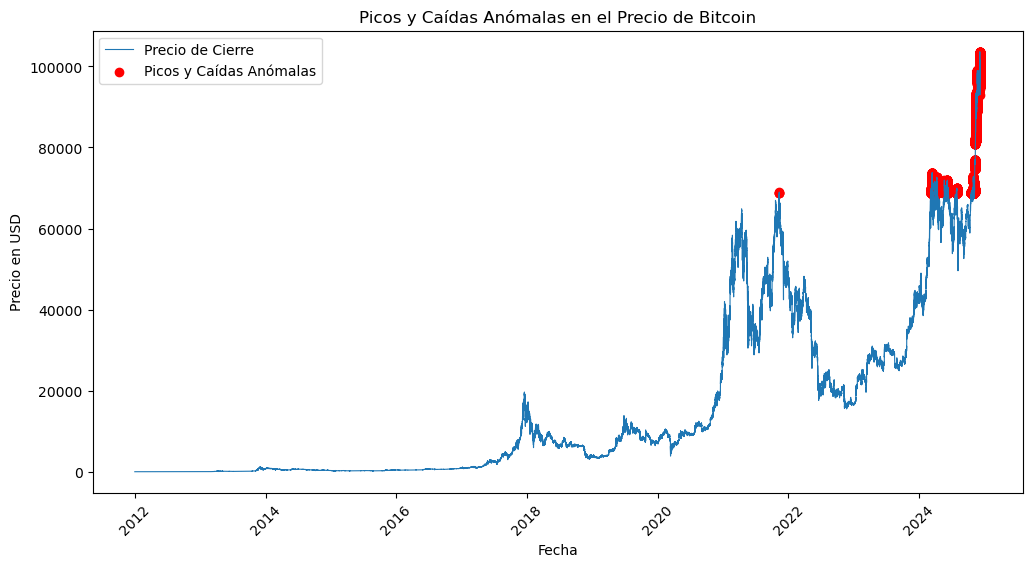

In [10]:
# Usamos Isolation Forest para detectar anomalías
model = IsolationForest(contamination=0.01, random_state=42)    #contamination=0.01: Define que el 1% de los datos serán tratados como anomalías(Puedes ajustarlo según necesites)
df['anomaly'] = model.fit_predict(df[['Close']])                #random_state=42: Fija una semilla para garantizar que los resultados sean reproducibles.

# Anomalías serán aquellas donde anomaly == -1                  #fit_predict realiza el entrenamiento y asigna una etiqueta a cada dato.
anomalies = df[df['anomaly'] == -1]                             # 1: normal, -1: anormal

# Visualizamos las anomalías detectadas
plt.figure(figsize=(12,6))
plt.plot(df['Timestamp'], df['Close'], label='Precio de Cierre', linewidth = 0.8)
plt.scatter(anomalies['Timestamp'], anomalies['Close'], color='red', label='Picos y Caídas Anómalas')
plt.title('Picos y Caídas Anómalas en el Precio de Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio en USD')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Resumen del proceso:

1. El modelo Isolation Forest analiza los precios de cierre y detecta valores atípicos basándose en su comportamiento inusual.
2. Los precios anómalos (ya sean picos altos o caídas pronunciadas) se etiquetan con -1 y se extraen en un DataFrame aparte.
3. Finalmente, los resultados se visualizan:
    * La línea azul representa el precio normal del Bitcoin.
    * Los puntos rojos indican las anomalías detectadas, resaltando picos o caídas atípicas en el precio.

## 4. Investigación de Causas de los Picos y Caídas

Una vez identificado los picos y caídas, pasamos a investigar por qué ocurrieron.

* Noticias importantes: anuncios regulatorios o de adopción institucional.
* Eventos de mercado: Caídas en el precio de criptomonedas más pequeñas, incidentes de hackeo, etc.

In [11]:
# Inspeccionar los datos de anomalías
print(f'Resumen de anomalías detectadas:')
anomalies.describe() # Estadísticas descriptivas

Resumen de anomalías detectadas:


,Timestamp,Open,High,Low,Close,Volume,anomaly
count,67219,67219.000000,67219.000000,67219.000000,67219.000000,67219.000000,67219.0
mean,2024-06-27 05:59:58.313869312,75434.038898,75457.230487,75410.866432,75434.501054,1.824310,-1.0
min,2021-11-10 19:15:00,68004.000000,68724.000000,68004.000000,68724.000000,0.000000,-1.0
25%,2024-04-01 00:31:30,69449.000000,69462.000000,69435.000000,69449.000000,0.047522,-1.0
50%,2024-05-27 20:37:00,70488.000000,70507.000000,70467.000000,70487.000000,0.263948,-1.0
75%,2024-11-05 09:21:30,73149.000000,73168.000000,73130.000000,73149.000000,1.172628,-1.0
max,2024-12-08 00:00:00,103626.000000,103647.000000,103618.000000,103625.000000,325.202458,-1.0
std,NaN,10150.937129,10156.589171,10145.212699,10151.002664,5.520972,0.0


In [12]:
print("\nPrimeras 10 anomalías detectadas:")
anomalies.head(10)  # Mostrar las primeras 10 anomalías


Primeras 10 anomalías detectadas:


,Timestamp,Open,High,Low,Close,Volume,anomaly
5185394,2021-11-10 19:15:00,68744.92,68799.99,68702.35,68799.99,6.510699,-1
5185395,2021-11-10 19:16:00,68799.99,69000.00,68799.99,69000.00,18.186705,-1
5185396,2021-11-10 19:17:00,69000.00,69000.00,68644.92,68780.71,10.732037,-1
5185397,2021-11-10 19:18:00,68794.75,68894.10,68704.41,68733.68,3.124684,-1
6402770,2024-03-05 06:51:00,68704.00,68767.00,68639.00,68767.00,5.564851,-1
6402771,2024-03-05 06:52:00,68762.00,68789.00,68730.00,68762.00,0.034901,-1
6402772,2024-03-05 06:53:00,68789.00,68850.00,68769.00,68811.00,1.979017,-1
6402773,2024-03-05 06:54:00,68797.00,68847.00,68702.00,68797.00,0.327671,-1
6403552,2024-03-05 19:53:00,68703.00,68749.00,68622.00,68736.00,5.852766,-1
6403553,2024-03-05 19:54:00,68739.00,68831.00,68710.00,68819.00,13.384337,-1


### 4.1. Clasificación de los picos y caídas

In [13]:
## Definir los límites para clasificar los picos y las caídas
q1 = anomalies['Close'].quantile(0.25)  # Primer cuartil (caídas anómalas)
q3 = anomalies['Close'].quantile(0.75)  # Tercer cuartil(picos anómalos)

# Clasificar anomalías en picos y caídas
picos = anomalies[anomalies['Close'] > q3]
caidas = anomalies[anomalies['Close'] < q1]

In [14]:
# Mostrar estadísticas descriptivas para picos
print("Resumen de Picos Anómalos:")
picos.describe()

Resumen de Picos Anómalos:


,Timestamp,Open,High,Low,Close,Volume,anomaly
count,16802,16802.000000,16802.000000,16802.000000,16802.000000,16802.000000,16802.0
mean,2024-11-10 13:12:48.901321728,91359.555291,91392.622962,91326.906499,91360.616891,2.784608,-1.0
min,2024-03-13 12:09:00,73046.000000,73150.000000,73041.000000,73150.000000,0.000000,-1.0
25%,2024-11-13 13:59:15,88163.250000,88211.000000,88124.000000,88168.750000,0.119723,-1.0
50%,2024-11-21 17:19:30,94320.500000,94375.500000,94283.000000,94315.000000,0.594802,-1.0
75%,2024-11-29 20:39:45,97512.000000,97539.000000,97491.750000,97512.000000,2.425228,-1.0
max,2024-12-08 00:00:00,103626.000000,103647.000000,103618.000000,103625.000000,325.202458,-1.0
std,NaN,8424.081389,8425.303034,8421.565111,8423.082281,7.035741,0.0


In [15]:
# Mostrar estadísticas descriptivas para caídas
print("\nResumen de Caídas Anómalas:")
caidas.describe()


Resumen de Caídas Anómalas:


,Timestamp,Open,High,Low,Close,Volume,anomaly
count,16785,16785.000000,16785.000000,16785.000000,16785.000000,16785.000000,16785.0
mean,2024-05-29 09:13:33.233244160,69141.025121,69157.593988,69123.969656,69140.974583,1.261096,-1.0
min,2021-11-10 19:15:00,68004.000000,68724.000000,68004.000000,68724.000000,0.000000,-1.0
25%,2024-04-09 21:48:00,68965.000000,68982.000000,68944.000000,68965.000000,0.015740,-1.0
50%,2024-05-26 17:20:00,69168.000000,69185.000000,69150.000000,69168.000000,0.128280,-1.0
75%,2024-06-08 20:46:00,69338.000000,69349.000000,69323.000000,69337.000000,0.612180,-1.0
max,2024-11-06 00:00:00,70018.000000,70184.000000,69448.000000,69448.000000,105.518471,-1.0
std,NaN,218.231704,213.906934,219.207883,214.041832,4.342830,0.0


### 4.2 Visualizar el gráfico de picos y caídas

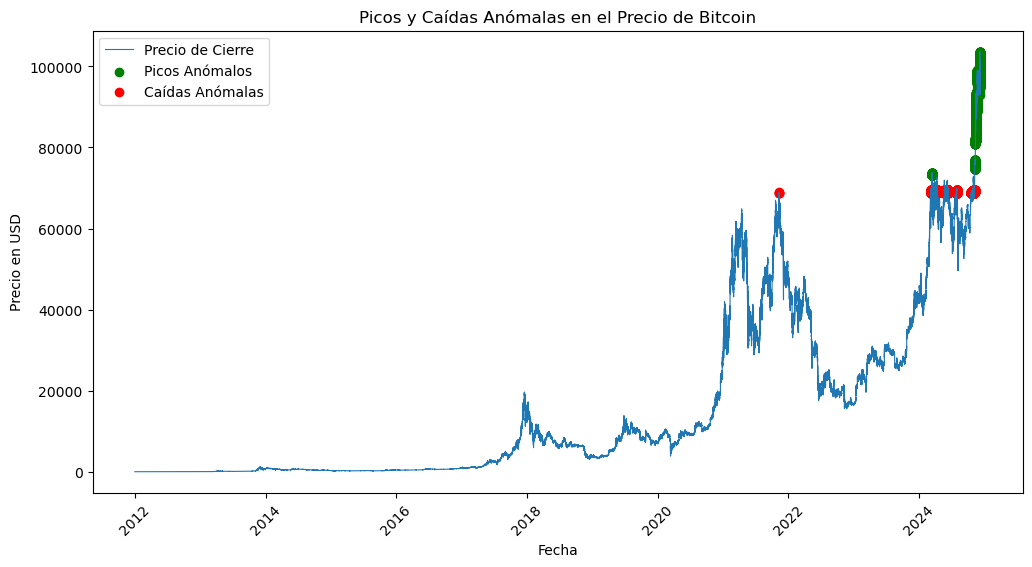

In [16]:
# Visualizar picos y caídas en el gráfico
plt.figure(figsize=(12,6))
plt.plot(df['Timestamp'], df['Close'], label='Precio de Cierre', linewidth = 0.8)
plt.scatter(picos['Timestamp'], picos['Close'], color='green', label='Picos Anómalos')
plt.scatter(caidas['Timestamp'], caidas['Close'], color='red', label='Caídas Anómalas')
plt.title('Picos y Caídas Anómalas en el Precio de Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio en USD')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### 4.3. Identificar el pico más alto y la caída más baja en 2024 de las anomalías detectadas:

In [17]:
# Ordenar las anomalías por precio de cierre 
picos_mas_altos = anomalies.sort_values(by='Close', ascending = False).head(1)
caidas_mas_bajas = anomalies.sort_values(by='Close', ascending = True).head(1)

# Mostrar los resultados
print("El Pico más alto en 2024:")
print(picos_mas_altos[['Timestamp', 'Close']])
print('\n')
print("La Caída más baja en 2024:")
print(caidas_mas_bajas[['Timestamp', 'Close']])

El Pico más alto en 2024:
                  Timestamp     Close
6723753 2024-12-05 15:14:00  103625.0


La Caída más baja en 2024:
                  Timestamp    Close
6522191 2024-05-27 05:12:00  68724.0


### 4.4. Visualizar el pico y caída más baja en 2024

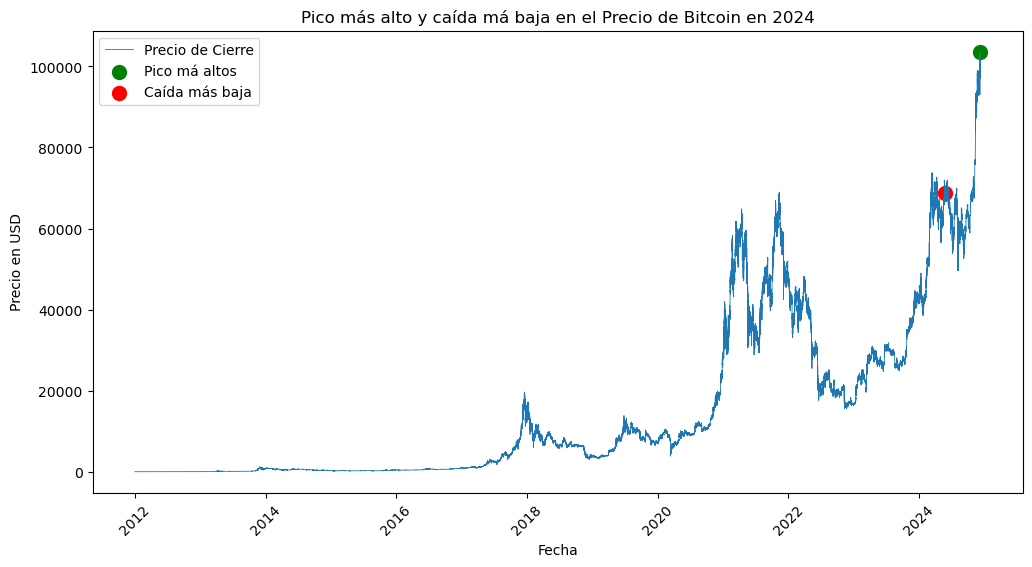

In [18]:
# Visualizar los resultados
plt.figure(figsize=(12,6))
plt.plot(df['Timestamp'], df['Close'], label='Precio de Cierre', linewidth = 0.6)
plt.scatter(picos_mas_altos['Timestamp'], picos_mas_altos['Close'], color='green', label='Pico má altos', s=100)
plt.scatter(caidas_mas_bajas['Timestamp'], caidas_mas_bajas['Close'], color='red', label='Caída más baja', s=100)
plt.title('Pico más alto y caída má baja en el Precio de Bitcoin en 2024')
plt.xlabel('Fecha')
plt.ylabel('Precio en USD')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Análisis Pico más alto: 5 de diciembre de 2024 (103,625 USD)

* ¿QUÉ CAUSÓ ESTOS PICOS?

1. Adopción de Bitcoin como refugio de valor: La alta inflación y la devaluación de monedas tradicionales impulsaron a los inversores hacia Bitcoin como una forma de protección. 

2. Ciclo alcista del mercado de criptomonedas: El mercado de criptomonedas experimentó una fase alcista, con un fuerte interés de inversores institucionales y minoristas.

3. Regulación favorable e interés institucional: Políticas regulatorias más amigables y la creciente adopción por parte de grandes empresas contribuyeron al aumento del precio.

4. Innovaciones tecnológicas: Avances como la expansión de la Bitcoin Lightning Network podrían haber favorecido el uso y la confianza en la criptomoneda.

### Análisis Caída más baja: 27 de mayo de 2024 (68,724 USD)

* ¿QUÉ CAUSÓ ESTAS CAÍDAS?

1. Restricciones regulatorias: Aumento de restricciones sobre las criptomonedas en países clave como China e India, lo que afectó la confianza en Bitcoin.

2. Crisis de confianza en los intercambios de criptomonedas: La quiebra de plataformas importantes de criptomonedas o vulnerabilidades en el ecosistema afectaron el precio.

3. Subida de tasas de interés y política monetaria restrictiva: Aumento de las tasas de interés por parte de la Reserva Federal de EE. UU., que desincentivó la inversión en activos de alto riesgo.

4. Inestabilidad económica global: Factores como la caída de los mercados tradicionales o crisis macroeconómicas provocaron una caída en el precio de Bitcoin.




### 4.5 Según el gráfico también existe un precio de cierre anómalo en el precio del bitcoin, perteneciente al año 2021, vamos a averiguarlo

In [19]:
# Filtrar las anomalías para el año 2021
anomalies_2021 = anomalies[anomalies['Timestamp'].dt.year == 2021]

# Encontrar el pico más alto en las anomalías de 2021
pico_mas_alto_2021 = anomalies_2021.sort_values(by='Close', ascending=False).iloc[0]

# Mostrar los resultados
print("Pico más alto en las anomalías de 2021:")
print(pico_mas_alto_2021[['Timestamp', 'Close']])

Pico más alto en las anomalías de 2021:
Timestamp    2021-11-10 19:16:00
Close                    69000.0
Name: 5185395, dtype: object


### 4.6 Visualizar el gráfico con el pico más alto en el precio de cierre de bitcoin en 2021

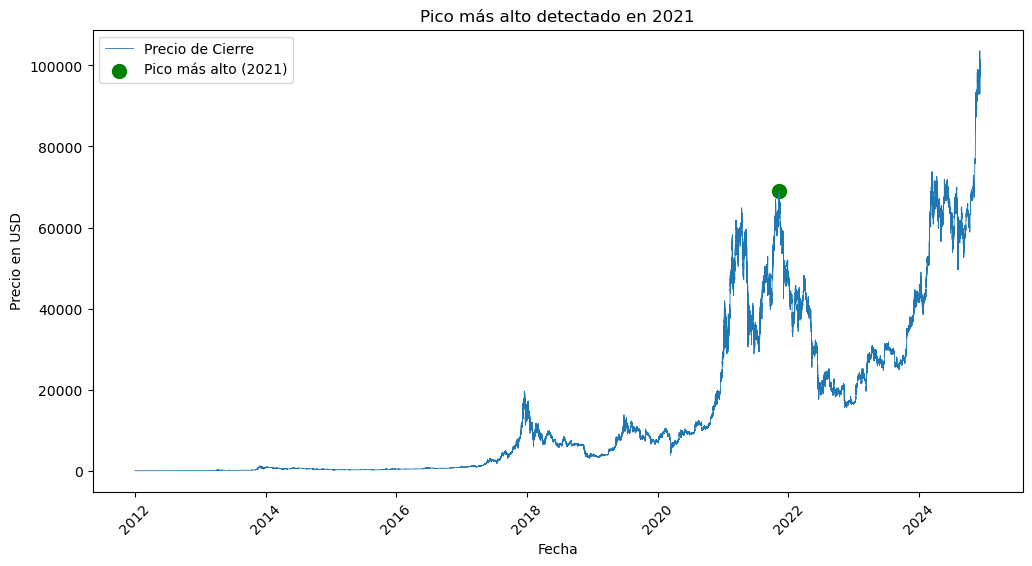

In [20]:
# Visualizar el resultado
plt.figure(figsize=(12,6))
plt.plot(df['Timestamp'], df['Close'], label='Precio de Cierre', linewidth = 0.6)
plt.scatter(pico_mas_alto_2021['Timestamp'], pico_mas_alto_2021['Close'], color='green', label='Pico más alto (2021)', s=100)
plt.title('Pico más alto detectado en 2021')
plt.xlabel('Fecha')
plt.ylabel('Precio en USD')
plt.xticks(rotation=45)
plt.legend()
plt.show()

El 10 de noviembre de 2021, Bitcoin alcanzó su precio de cierre más alto en 2021, alcanzando los 69,000 USD. Este evento se produjo en un contexto donde varios factores convergieron para impulsar el precio de Bitcoin a niveles históricos. A continuación, se mencionan algunos eventos  que podrían haber influido en este incremento en el precio de Bitcoin en esa fecha:

* ¿QUÉ CAUSÓ ESTE PICO?

1. Participación Institucional: La adopción de Bitcoin por instituciones financieras como Tesla y MicroStrategy impulsó el precio, junto con el lanzamiento de futuros de Bitcoin y el primer ETF de Bitcoin en octubre de 2021.
    
    Información completa: (https://www.coindesk.com/)
2. Aumento de la Inflación y la Inestabilidad Económica Global: Aumento de la inflación y las preocupaciones sobre la devaluación de las monedas fiduciarias hicieron que los inversores viesen a Bitcoin como una protección frente a la inflación.

    Información completa: https://www.forbes.com/
3. Aumento del Interés Minorista: Plataformas como Robinhood y Coinbase facilitaron el acceso de los inversores minoristas, aumentando la demanda de Bitcoin.

    Información completa: https://cointelegraph.com/

4. Optimismo de los Mineros y la Escasez de Oferta: La recompensa de los mineros se redujo debido al halving, lo que aumentó la presión en la oferta de Bitcoin, impulsando su precio.

    Información completa: https://academy.binance.com/es/glossary/halving

5. Posición de Gobiernos: Mientras algunos países como El Salvador adoptaron Bitcoin, otros lo prohibieron, lo que generó incertidumbre y, a su vez, volatilidad en su precio.

    Información completa: https://www.bbc.com/mundo/noticias-america-latina-57373067

### Resumen:

* El precio de Bitcoin alcanzó los 69,000 USD el 10 de noviembre de 2021 debido a una combinación de factores, entre ellos el aumento de la adopción institucional y minorista, la preocupación sobre la inflación y la estabilidad económica global, el incremento del interés en activos no tradicionales, y el impacto positivo de desarrollos como el lanzamiento de futuros y ETFs de Bitcoin. Además, la tendencia alcista se vio alimentada por el crecimiento general del ecosistema cripto y el interés en Bitcoin como una "reserva de valor".

## Conclusión

Este proyecto ha permitido detectar y analizar los picos y caídas drásticas en el precio de Bitcoin desde 2012 hasta 2024, utilizando técnicas de análisis de series temporales y algoritmos de detección de anomalías como Isolation Forest. Los resultados muestran que tanto factores internos, como la especulación y decisiones de grandes inversores, como factores externos, como regulaciones y crisis económicas, influyen en la volatilidad de Bitcoin.

Aunque los modelos utilizados ofrecen una base sólida para entender estos movimientos extremos, el mercado de criptomonedas sigue siendo impredecible, lo que sugiere que el análisis debe seguir evolucionando para mejorar la predicción de futuros movimientos. Este estudio contribuye a una mejor comprensión de las dinámicas del mercado de Bitcoin, proporcionando herramientas útiles para inversores y analistas.